# PHY480/905 Semester Project Template

**INSTRUCTIONS**: This is a template to help organize your project.  All projects must include the 5 major sections below (you do not need to use this template file).  Complete your work below and remove content in parentheses. 

#### PHY 480/905 Semester Project
### &#9989; Kinza Hasan)
#### &#9989; Last Updated on WHAT DATE

# Van der Pol Oscillator

##  Introduction 

 
The Van Der Pol Oscillator that I will be looking at in this project is an example of a classical oscillator that models various electronic and biological systems. It was origianlly by the Dutch electrical engineer Balthasar van der Pol in the 1920s as he was studying electric circuits in Vacuum tubes. In such systems the oscillations eventually reach a limit cycle which Van der Pol called 'relaxation oscillations'. These types of oscillations are eventually self sustained and so are very interesting to study. The differential equation describing this type of oscillatory behaviour is given below:

$\frac{d^2x}{dt^2} - \mu(1-x^2)\frac{dx}{dt} +\beta x =F(sin(\alpha t)$

Due to the $\mu$ and $\alpha$ dependance the equation does not have generalised closed form solutions as of yet.Therefore we need some sort of a numeical integration method to solve the equation and study the behaviour of the system. Therefore in this project I attempted to look at various integration techniques to solve this problem and then therefore study the mu and alpha dependance to see how does the position velocity and phase space changes for this model for a set of initial conditions.

**Questions Asked**
- What is the best numerical integration method to solve this problem?
- How does the behaviour of the system change as we vary the mu parameter?
- How does the behaviour of the system change as we vary the alpha parameter?


## Methodology

In [3]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import pandas as pd
import os

import time
from IPython.display import clear_output
%matplotlib inline
#importing necessary modules

When $\mu$ and $\alpha$ are zero the differentail equation reduces to a simple harmonic oscillator with known analytical solutions.
For the purposes of this anlysis we asume $\beta=1$. The initial conditions we will consider in this report are that $x(0)=1$ and $x'(0)=0$.

The Van der pol equation then reduces to:
$\frac{d^2x}{dt^2} +\beta x =0$ with the analytical solution $x=cos(t)$

Now that we know the analytical solution we will look at various integration techniques one by one and comapre them to the analytical solution. To test the avlidity of each solution we will look at the eman error and the maxmium error. We will first see if both the errors converge to zero as we increase the number of time step iterations and then compare the 6 integration techniques with each other to determine the most accurate one.

In [23]:
#Numerical solutions:

def VDPO(mu,t,X, V):
    dX = V
    dV = mu*(1-X**2)*V - X
    return dX, dV
'''Defining the Van der Pol oscillator function without the driving force'''
# Looking at the yssytem where mu is zero to see the most relaible integration method to compare it with the analytical

'Defining the Van der Pol oscillator function without the driving force'

In [24]:
t=np.arange(0,1000,10)
Act=np.cos(t)
#Calculating the Actual solution

The first integration method we will look at is the runga kutta 2 method that we also looked at in the class.

In [25]:
#RK 2


def RK(f, tf, n, mu):
    v = 0
    x = 1
    X_values = []
    V_values = []
    h = tf / n
    tpoints = np.arange(0, tf, h)
    for t in tpoints:
        X_values.append(x)
        V_values.append(v)
        k1x, k1v = f(mu, t, x, v)
        k2x, k2v = f(mu, t + h, x + h * k1x, v + h * k1v)
        x += h * (k2x + k1x) / 2
        v += h * (k2v + k1v) / 2
    return tpoints, X_values, V_values


In [26]:
#Testing convergencee by increasing number of time steps:
tsteps=[100,1000,10000,100000]
mean_err=[]
max_err=[]
for ts in tsteps:
    trk,xrk,vrk=RK(VDPO,20,ts,0)
    Act=np.cos(trk)
    max_err.append(np.max(np.abs(xrk-Act)))
    mean_err.append(np.mean(np.abs(xrk-Act)))
    
    

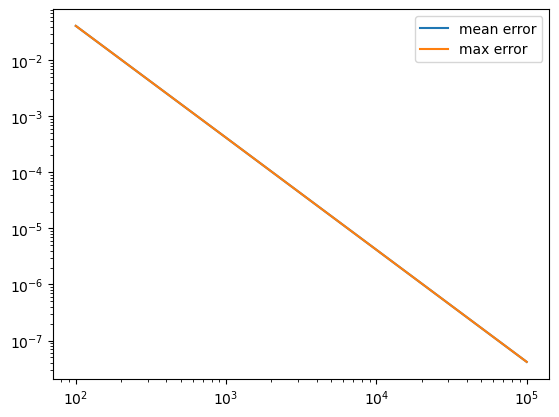

In [27]:
plt.plot(tsteps,mean_err,label='mean error')
plt.plot(tsteps,mean_err,label='max error')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

In [28]:
trkut,xrkut,vrkut=RK(VDPO,20,1000000,0)


The next integration method is Runga Kutta 4 which we also looked at in class.

In [209]:

def RK4(f, tf, n, mu):
    v = 0
    x = 1
    X_values = []
    V_values = []
    h = tf / n
    tpoints = np.arange(0, tf, h)
    for t in tpoints:
        X_values.append(x)
        V_values.append(v)
        
        k1x, k1v = f( mu, t, x, v)
    
        k2x, k2v = f( mu, t + h / 2, x + h / 2 * k1x, v + h / 2 * k1v)
    
        k3x, k3v = f( mu, t + h / 2, x + h / 2 * k2x, v + h / 2 * k2v)
    
        k4x, k4v = f( mu, t + h, x + h * k3x, v + h * k3v)
    
        x += h / 6 * (k1x + 2 * k2x + 2 * k3x + k4x)
        v += h / 6 * (k1v + 2 * k2v + 2 * k3v + k4v)
        
    return tpoints, X_values, V_values

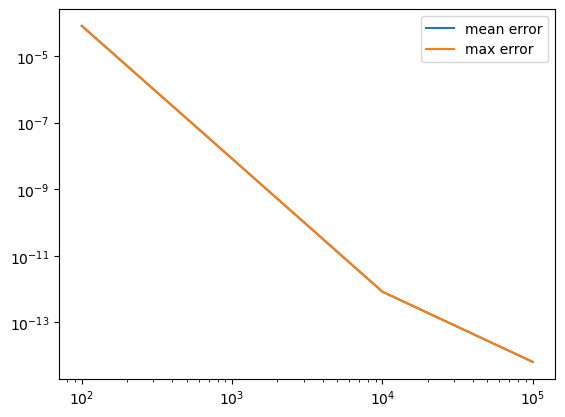

In [32]:
tsteps=[100,1000,10000,100000]
mean_err=[]
max_err=[]
for ts in tsteps:
    trk,xrk,vrk=RK4(VDPO,20,ts,0)
    Act=np.cos(trk)
    max_err.append(np.max(np.abs(xrk-Act)))
    mean_err.append(np.mean(np.abs(xrk-Act)))
plt.plot(tsteps,mean_err,label='mean error')
plt.plot(tsteps,mean_err,label='max error')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

In [33]:
trk4,xrk4,vrk4=RK4(VDPO,20,1000000,0)


The next method is Runga Kutta 45 -Fehlberg method, here instead of looping a cerain number of times we introduce an error parameter as epsilon and the function loops while that error becomes less than the final t given, and the step size h is adjusted according to the error. This method also does not follow the same convergence as we increase the step size.

In [118]:
def RK45(func, tf, n, mu):
    # Initialize parameters
    epsilon = 1e-6  # Error tolerance
    x_initial = 1  # Initial position
    v_initial = 0  # Initial velocity
    t0 = 0  # Initial time
    h = tf / n  # Step size
    t = t0  # Initialize time
    x = x_initial  # Initialize position
    v = v_initial  # Initialize velocity

    # Initialize lists to store results
    tpoints = [t0]
    x_values = [x_initial]
    v_values = [v_initial]

    # Main loop
    while t < tf:
        # Calculate k1 to k6
        k1x, k1v = func(mu, t, x, v)
        k2x, k2v = func(mu, t + h / 4, x + h * k1x / 4, v + h * k1v / 4)
        k3x, k3v = func(mu, t + 3 * h / 8, x + 3 * h * k1x / 32 + 9 * h * k2x / 32,
                        v + 3 * h * k1v / 32 + 9 * h * k2v / 32)
        k4x, k4v = func(mu, t + 12 * h / 13, x + 1932 * h * k1x / 2197 - 7200 * h * k2x / 2197 + 7296 * h * k3x / 2197,
                        v + 1932 * h * k1v / 2197 - 7200 * h * k2v / 2197 + 7296 * h * k3v / 2197)
        k5x, k5v = func(mu, t + h, x + h * (439 * k1x / 216 - 8 * k2x + 3680 * k3x / 513 - 845 * k4x / 4104),
                        v + h * (439 * k1v / 216 - 8 * k2v + 3680 * k3v / 513 - 845 * k4v / 4104))
        k6x, k6v = func(mu, t + h / 2, x - 8 * h * k1x / 27 + 2 * h * k2x / 3 - 3544 * h * k3x / 2565 + 1859 * h * k4x / 4104 - 11 * h * k5x / 40,
                        v - 8 * h * k1v / 27 + 2 * h * k2v / 3 - 3544 * h * k3v / 2565 + 1859 * h * k4v / 4104 - 11 * h * k5v / 40)

        # Compute next step value w1 and w2
        x1 = x + h * (25 * k1x / 216 + 1408 * k3x / 2565 + 2197 * k4x / 4104 -1* k5x / 5) 
        v1 = v + h * (25 * k1v / 216 + 1408 * k3v / 2565 + 2197 * k4v / 4104 -1 * k5v / 5) 
        x2 = x + h * (16 * k1x / 135 + 6656 * k3x / 16285 +  28561 * k4x / 56430 -9 * k5x / 50 + 2* k6x / 55)
        v2 = v + h * (16* k1v / 135 + 6656 * k3v / 16285 +  28561* k4v / 56430 -9 * k5v / 50 + 2* k6v / 55)

        # Compute error R
        R = 1/h * np.abs(np.sqrt(x1**2+v1**2)-np.sqrt(x2**2+v2**2))

        # Check error tolerance
        if R <= epsilon:
            t += h
            x = x1
            v = v1
            tpoints.append(t)
            x_values.append(x)
            v_values.append(v)
            h = min(0.84 * (epsilon / R) ** 0.25 * h, tf - t)  # Adjust step size
        else:
            h *= 0.84 * (epsilon / R) ** 0.25  # Reduce step size and retry

    return tpoints, x_values, v_values

       

#https://math.okstate.edu/people/yqwang/teaching/math4513_fall11/Notes/rungekutta.pdf

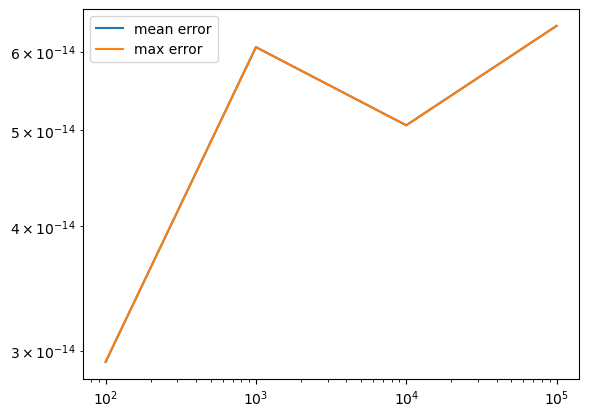

In [119]:
tsteps=[100,1000,10000,100000]
mean_err=[]
max_err=[]
for ts in tsteps:
    trk,xrk,vrk=RK45(VDPO,20,ts,0)
    Act=np.cos(trk)
    max_err.append(np.max(np.abs(xrk-Act)))
    mean_err.append(np.mean(np.abs(xrk-Act)))
plt.plot(tsteps,mean_err,label='mean error')
plt.plot(tsteps,mean_err,label='max error')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

In [120]:
trk45,xrk45,vrk45= RK45(VDPO, 20, 1000000, 0)


The next method we looked at was Euler which was also done in class

In [121]:

def euler(f, tf, n, mu):
    V_values = [0]  # Initial condition for V
    X_values = [1]  # Initial condition for X
    h = tf / n
    tpoints = np.arange(0, tf, h)
    for t in tpoints[1:]:
        X, V = X_values[-1], V_values[-1]
        
        # Calculate derivatives at the current point
        dX, dV = f(mu, t, X, V)
        
        # Update X and V using Euler's method
        X_new = X + h * dX
        V_new = V + h * dV
        
        # Append the new values to the lists
        X_values.append(X_new)
        V_values.append(V_new)
        
    return tpoints, X_values, V_values



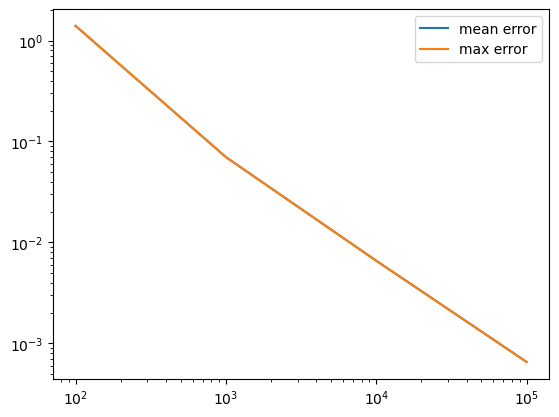

In [122]:
tsteps=[100,1000,10000,100000]
mean_err=[]
max_err=[]
for ts in tsteps:
    trk,xrk,vrk=euler(VDPO,20,ts,0)
    Act=np.cos(trk)
    max_err.append(np.max(np.abs(xrk-Act)))
    mean_err.append(np.mean(np.abs(xrk-Act)))
plt.plot(tsteps,mean_err,label='mean error')
plt.plot(tsteps,mean_err,label='max error')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

In [123]:
te,xe,ve=euler(VDPO,20,1000000,0)


The next method is called the Adams-Bashfroth method 2 and it introduces a linear multi step to obtain the next value of x and v, twice

In [124]:
def AB2(f, tf, n, mu):
    v = 0
    x = 1
    X_values = []
    V_values = []
    h = tf / n
    tpoints = np.arange(0, tf, h)
 
    X_values.append(x)
    V_values.append(v)
    k1x, k1v = f(mu, 0, x, v)  # Initial value at t=0
    v += h * k1v
    x += h * (v + h / 2 * k1v)
    
    X_values.append(x)
    V_values.append(v)
    k2x, k2v = f(mu, h, x, v)  # Value at first step
    v += h * k2v
    x += h * (v + h / 2 * k2v)
    
    for t in tpoints[2:]:
        X_values.append(x)
        V_values.append(v)
  
        fn_minus_1_x, fn_minus_1_v = f(mu, t - h, X_values[-2], V_values[-2])  # Value at t - h
        fn_x, fn_v = f(mu, t, X_values[-1], V_values[-1])  # Current value
        
        x += h / 2 * (3 * fn_x - fn_minus_1_x)
        v += h / 2 * (3 * fn_v - fn_minus_1_v)
        
    return tpoints, X_values, V_values

#https://john-s-butler-dit.github.io/NumericalAnalysisBook/Chapter%2004%20-%20Multistep%20Methods/402_Adams%20Bashforth%20Population%20Equations.html

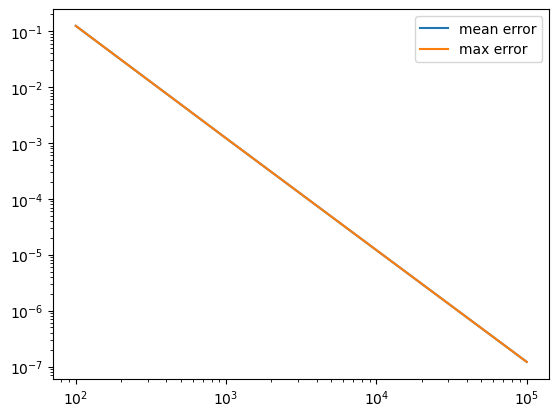

In [125]:
tsteps=[100,1000,10000,100000]
mean_err=[]
max_err=[]
for ts in tsteps:
    trk,xrk,vrk=AB2(VDPO,20,ts,0)
    Act=np.cos(trk)
    max_err.append(np.max(np.abs(xrk-Act)))
    mean_err.append(np.mean(np.abs(xrk-Act)))
plt.plot(tsteps,mean_err,label='mean error')
plt.plot(tsteps,mean_err,label='max error')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

In [126]:
tab2,xab2,vab2=AB2(VDPO,20,1000000,0)


This is the same method as Adams Bashforth 2 but it uses a 4 time multistep to append to x and v accordingly

In [127]:
#Adams-Bashforth
def AB4(f, tf, n, mu):
    v = 0
    x = 1
    X_values = []
    V_values = []
    h = tf / n
    tpoints = np.arange(0, tf, h)
    
    for _ in range(3):
        X_values.append(x)
        V_values.append(v)
        k1x, k1v = f(mu, 0, x, v)  # Initial value at t=0
        v += h * k1v
        x += h * (v + h / 2 * k1v)
    
    for t in tpoints[3:]:
        X_values.append(x)
        V_values.append(v)
       
        fn_minus_1_x, fn_minus_1_v = f(mu, t - 2 * h, X_values[-2], V_values[-2])  # Value at t - 2h
        fn_minus_2_x, fn_minus_2_v = f(mu, t - h, X_values[-3], V_values[-3])  # Value at t - h
        fn_minus_3_x, fn_minus_3_v = f(mu, t, X_values[-4], V_values[-4])  # Value at t
        
        fn_x, fn_v = f(mu, t + h, X_values[-1], V_values[-1])  # Current value
        
        x += h / 24 * (55 * fn_x - 59 * fn_minus_1_x + 37 * fn_minus_2_x - 9 * fn_minus_3_x)
        v += h / 24 * (55 * fn_v - 59 * fn_minus_1_v + 37 * fn_minus_2_v - 9 * fn_minus_3_v)
        
    return tpoints, X_values, V_values
#https://en.wikipedia.org/wiki/Linear_multistep_method

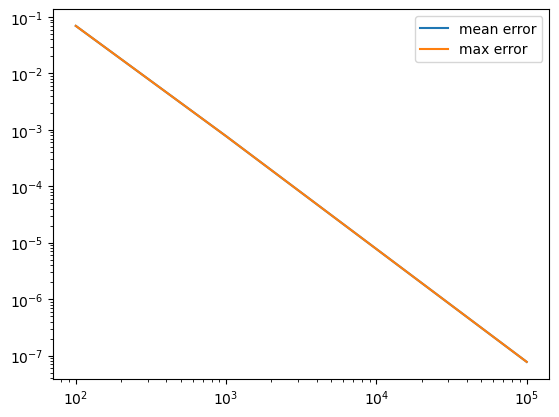

In [128]:
tsteps=[100,1000,10000,100000]
mean_err=[]
max_err=[]
for ts in tsteps:
    trk,xrk,vrk=AB4(VDPO,20,ts,0)
    Act=np.cos(trk)
    max_err.append(np.max(np.abs(xrk-Act)))
    mean_err.append(np.mean(np.abs(xrk-Act)))
plt.plot(tsteps,mean_err,label='mean error')
plt.plot(tsteps,mean_err,label='max error')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

In [129]:
tab4,xab4,vab4=AB4(VDPO,20,1000000,0)


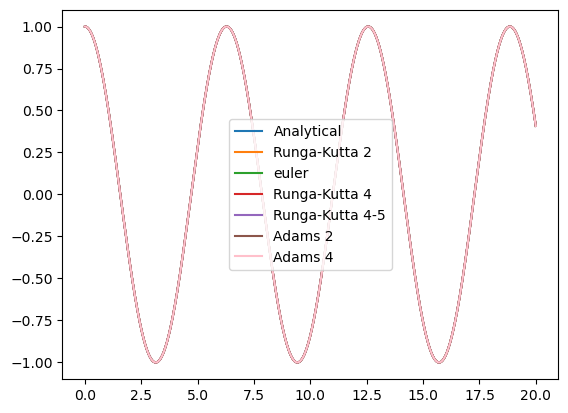

In [138]:
t=np.arange(0,20,20/1000000)
plt.plot(t,np.cos(t),label='Analytical')
plt.plot(t,xrkut,label='Runga-Kutta 2')
plt.plot(t,xe,label='euler')
plt.plot(trk4,xrk4,label='Runga-Kutta 4')
plt.plot(trk45,xrk45,label='Runga-Kutta 4-5')
plt.plot(t,xab2,label='Adams 2')
plt.plot(t,xab4,label='Adams 4',color='pink')
plt.legend()
plt.show()
#We now plot the analytical solution with respect to all other solutions

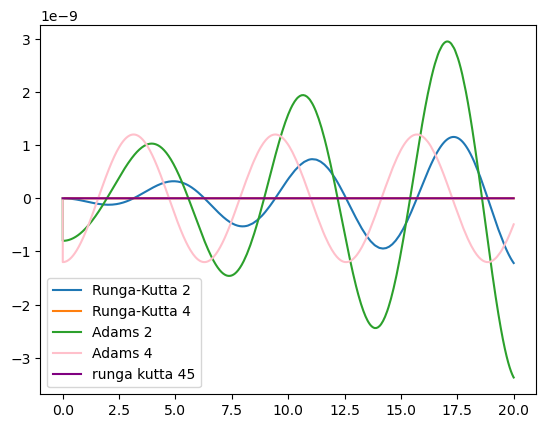

In [137]:
Act=np.cos(t)
plt.plot(t,xrkut-Act,label='Runga-Kutta 2')
plt.plot(t,xrk4-Act,label='Runga-Kutta 4')
plt.plot(t,xab2-Act,label='Adams 2')
plt.plot(t,xab4-Act,label='Adams 4',color='pink')
plt.plot(trk45,xrk45-np.cos(trk45),label='runga kutta 45',color='purple')
plt.legend()
#plt.plot(t,xe-Act,label='euler',color='purple')


In [135]:
#MEAN ERROR CALCULATION
mean_errors = {
    "Runga-kutta-2": np.mean(np.abs(xrkut-Act)),
    "Runga-kutta-4": np.mean(np.abs(xrk4-Act)),
    "Runga-kutta-45": np.mean(np.abs(xrk45-np.cos(trk45))),
    "Adams-Bashforth-2": np.mean(np.abs(xab2-Act)),
    "Adams-Bashforth-4": np.mean(np.abs(xab4-Act)),
    "Euler": np.mean(np.abs(xe-Act))
}
mean_errors

{'Runga-kutta-2': 4.156700765134582e-10,
 'Runga-kutta-4': 1.8397444364399766e-14,
 'Runga-kutta-45': 4.210915373792738e-14,
 'Adams-Bashforth-2': 1.2109266181654465e-09,
 'Adams-Bashforth-4': 7.747936771323581e-10,
 'Euler': 6.538656996656807e-05}

In [136]:
#Max errors:
max_errors = {
    "Runga-kutta-2": np.max(np.abs(xrkut-Act)),
    "Runga-kutta-4": np.max(np.abs(xrk4-Act)),
    "Runga-kutta-45": np.max(np.abs(xrk45-np.cos(trk45))),
    "Adams-Bashforth-2": np.max(np.abs(xab2-Act)),
    "Adams-Bashforth-4": np.max(np.abs(xab4-Act)),
    "Euler": np.max(np.abs(xe-Act))
}
max_errors

{'Runga-kutta-2': 1.2172624019868294e-09,
 'Runga-kutta-4': 4.729550084903167e-14,
 'Runga-kutta-45': 2.007283228522283e-13,
 'Adams-Bashforth-2': 3.369624801408122e-09,
 'Adams-Bashforth-4': 1.2000407334511465e-09,
 'Euler': 0.0001887781114034981}

#FINAL RESULT: We will use Runga Kutta-4 for when mu is not zero!
So now keeping $\alpha=0$ I will start the analysis for $\mu$. For this I will start to see how does the behaviour of the oscillator cahnge as we vary $\mu$ 

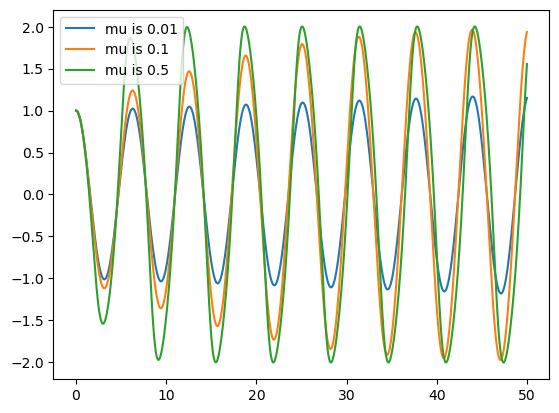

In [148]:
#Analysis for mu
mus=[0.01,0.1,0.5]
for mu in mus:
    trk4d,xrk4d,vrk4d=RK4(VDPO,50,100000,mu)
    plt.plot(trk4d,xrk4d,label=f'mu is {mu}')
plt.legend()
plt.show()

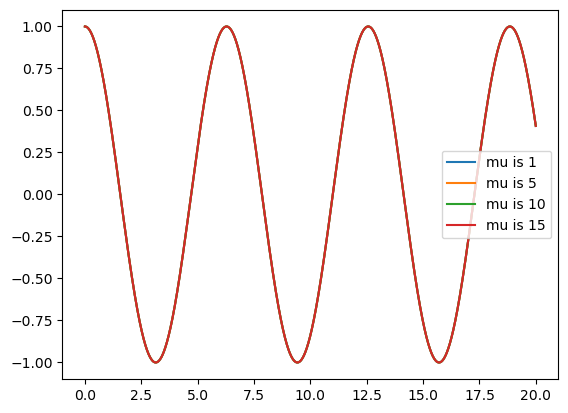

In [149]:
mus=[1,5,10,15]
for mu in mus:
    trk4d,xrk4d,vrk4d=RK4(VDPO,50,100000,mu)
    plt.plot(trk4,xrk4,label=f'mu is {mu}')
plt.legend()
plt.show()

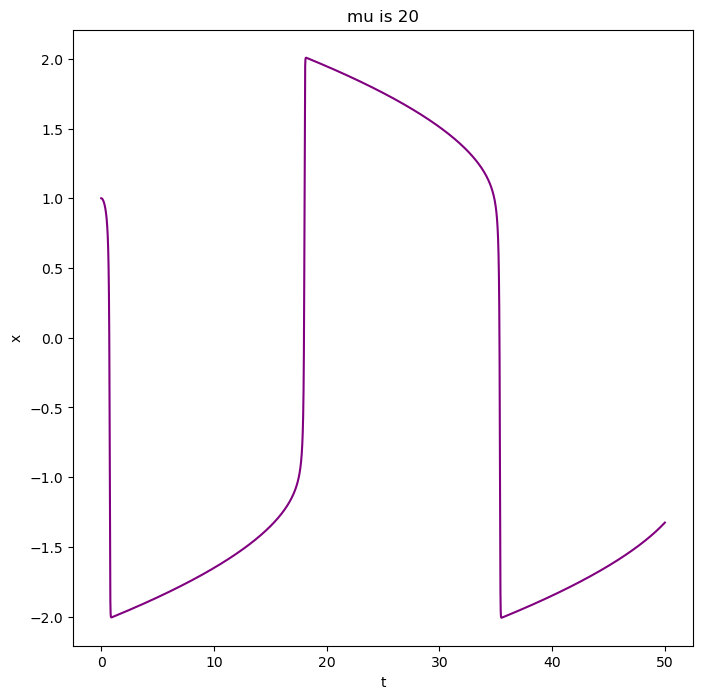

<Figure size 800x800 with 0 Axes>

In [150]:
#Animation as to how mu changes:
mus=[0.01,0.1,0,2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,15,20]
fig = plt.figure(figsize=(8,8))
# Generate and save images
for mu in mus:
    trk4d,xrk4d,vrkd4=RK4(VDPO,50,100000,mu)
    plt.plot(trk4d,xrk4d,color='purple')
    plt.title(f'mu is {mu}')
    plt.xlabel('t')
    plt.ylabel('x')
    time.sleep(0.01)
    
    clear_output(wait = True)
    display(fig)            # Reset display
    fig.clear()  


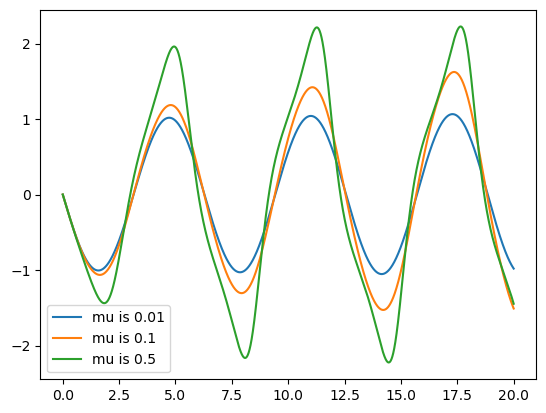

In [151]:
mus=[0.01,0.1,0.5]
for mu in mus:
    trk4d,xrk4d,vrk4d=RK4(VDPO,20,100000,mu)
    plt.plot(trk4d,vrk4d,label=f'mu is {mu}')
plt.legend()
plt.show()

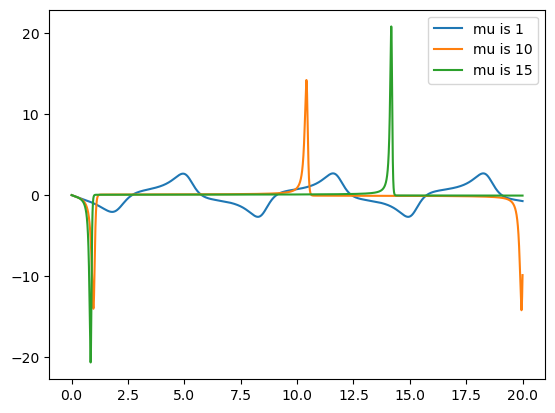

In [152]:
mus=[1,10,15]
for mu in mus:
    trk4d,xrk4d,vrk4d=RK4(VDPO,20,100000,mu)
    plt.plot(trk4d,vrk4d,label=f'mu is {mu}')
plt.legend()
plt.show()

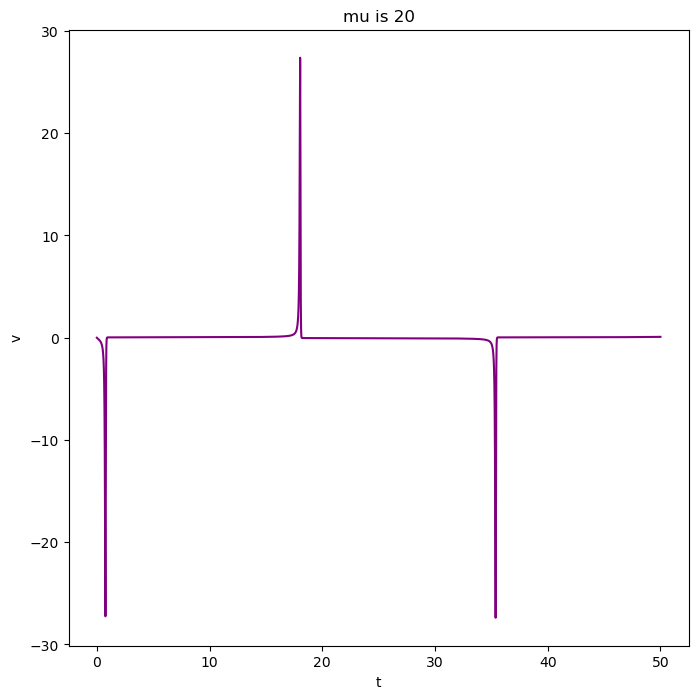

<Figure size 800x800 with 0 Axes>

In [153]:
mus=[0.01,0.1,0,2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,15,20]
fig = plt.figure(figsize=(8,8))
# Generate and save images
for mu in mus:
    trk4d,xrk4d,vrk4d=RK4(VDPO,50,100000,mu)
    plt.plot(trk4d,vrk4d,color='purple')
    plt.title(f'mu is {mu}')
    plt.xlabel('t')
    plt.ylabel('v')
    time.sleep(0.01)
    #plt.ylim(-30,30)
    
    clear_output(wait = True)
    display(fig)            # Reset display
    fig.clear()  


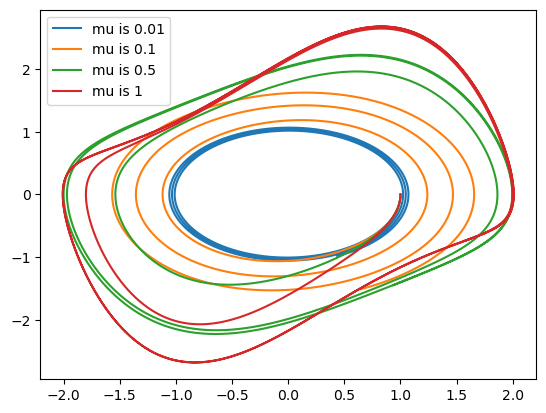

In [154]:
mus=[0.01,0.1,0.5,1]
#mus=[0.1,1,10]
for mu in mus:
    trk4d,xrk4d,vrk4d=RK4(VDPO,20,100000,mu)
    plt.plot(xrk4d,vrk4d,label=f'mu is {mu}')
plt.legend()
plt.show()

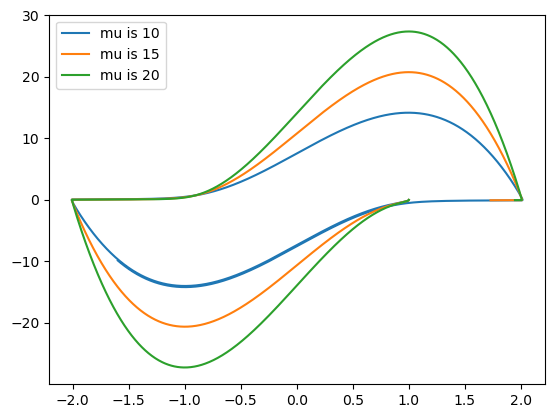

In [155]:
mus=[10,15,20]
for mu in mus:
    trk4d,xrk4d,vrk4d=RK4(VDPO,20,100000,mu)
    plt.plot(xrk4d,vrk4d,label=f'mu is {mu}')
plt.legend()
plt.show()

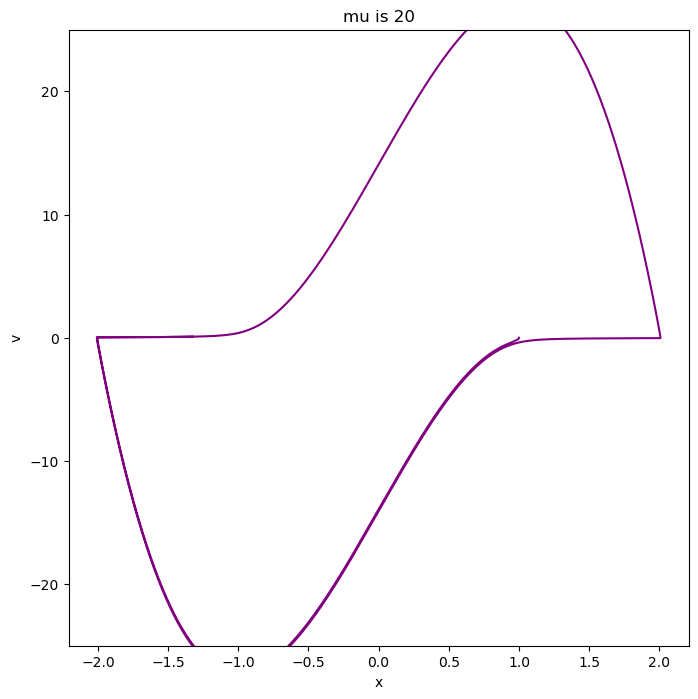

<Figure size 800x800 with 0 Axes>

In [157]:
#Animation as to how mu changes:
mus=[0.01,0.1,0,2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,15,20]
fig = plt.figure(figsize=(8,8))
# Generate and save images
for mu in mus:
    trk4d,xrk4d,vrk4d=RK4(VDPO,50,100000,mu)
    plt.plot(xrk4d,vrk4d,color='purple')
    plt.title(f'mu is {mu}')
    plt.xlabel('x')
    plt.ylabel('v')
    time.sleep(0.01)
    plt.ylim(-25,25)
    
    clear_output(wait = True)
    display(fig)            # Reset display
    fig.clear()  


Now that we know how the behaviour of the phase diagram change as we vary $\mu$ we will look at a specific instance where $\mu$ is 1

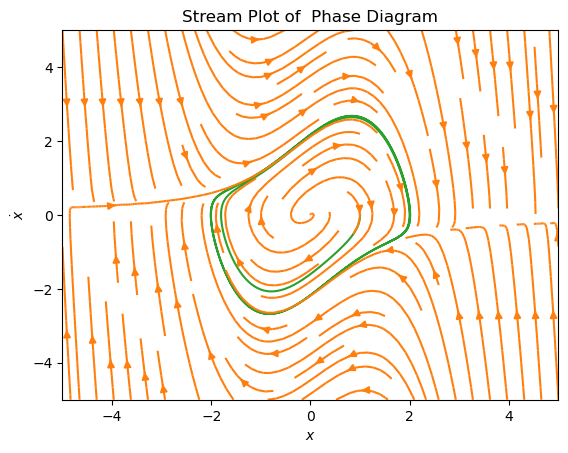

In [163]:
def generate_phase_space(x_lim, v_lim, grid_size,mu):

    x = np.linspace(x_lim[0], x_lim[1], grid_size)
    v = np.linspace(v_lim[0], v_lim[1], grid_size)
    
    X, V = np.meshgrid(x, v)
    
    dX, dV = VDPO(mu,trk4d,X, V)
    
    return X, V, dX, dV

x_lim = (-5, 5)
v_lim = (-5, 5)
grid_size = 20
X, V, dX, dV = generate_phase_space(x_lim, v_lim, grid_size,1)
t,x,v=RK4(VDPO,20,100000,1)

plt.plot(x,v, label='Sample trajectory', c='C2')
plt.streamplot(X, V, dX, dV, color='C1')
plt.title('Stream Plot of  Phase Diagram')
plt.xlabel(r'$x$')
plt.ylabel(r'$\dot{x}$');


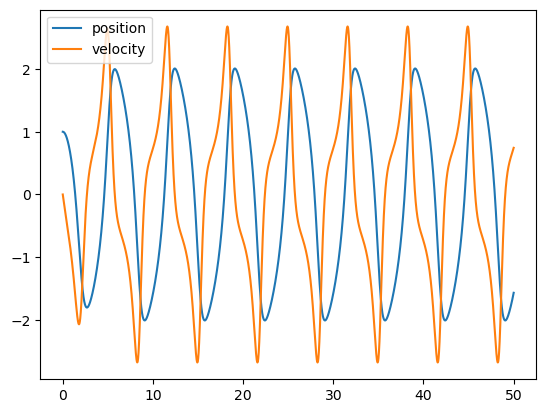

In [165]:
#Doing an enrgy Analysis:
#Looking at only mu=1
trk4d,xrk4d,vrk4d=np.array(RK4(VDPO,50,100000,1))
plt.plot(trk4d,xrk4d,label='position')
plt.plot(trk4d,vrk4d,label='velocity')
plt.legend()


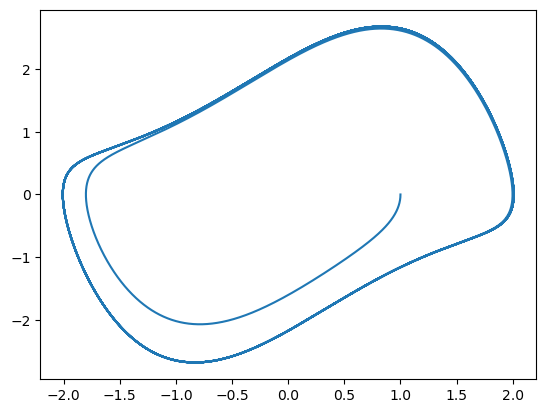

In [166]:
plt.plot(xrk4d,vrk4d)

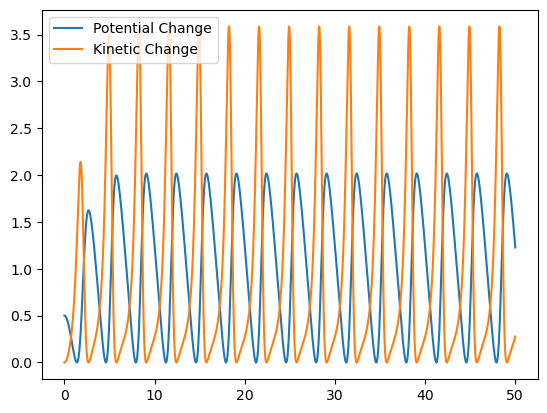

In [168]:
plt.plot(trk4d,0.5*xrk4d**2,label='Potential Change')
plt.plot(trk4d,0.5*vrk4d**2,label='Kinetic Change')
plt.legend()
plt.show()

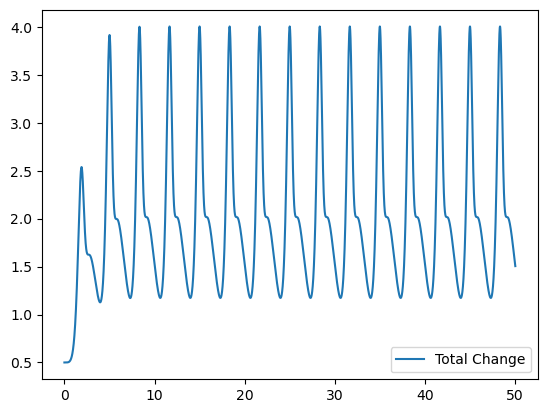

In [170]:

plt.plot(trk4d,0.5*vrk4d**2 + 0.5*xrk4d**2,label='Total Change')
plt.legend()
plt.show()

We will now look at the case where we vary $\alpha$, we will consider $\mu$ and $F$ to be 1 for the analysis below

In [221]:
#NEXT STEP: LOOK AT DAMPED DRIVEN
def VDPOD(a,mu,t,X, V):
    dX = V
    dV = mu*(1-X**2)*V - X + 1*np.sin(a*t) 
    return dX, dV

def RK4_2(f, tf, n, mu, a):
    v = 0
    x = 1
    X_values = []
    V_values = []
    h = tf / n
    tpoints = np.arange(0, tf, h)
    for t in tpoints:
        X_values.append(x)
        V_values.append(v)
        
        k1x, k1v = f(a, mu, t, x, v)
    
        k2x, k2v = f(a, mu, t + h / 2, x + h / 2 * k1x, v + h / 2 * k1v)
    
        k3x, k3v = f(a, mu, t + h / 2, x + h / 2 * k2x, v + h / 2 * k2v)
    
        k4x, k4v = f(a, mu, t + h, x + h * k3x, v + h * k3v)
    
        x += h / 6 * (k1x + 2 * k2x + 2 * k3x + k4x)
        v += h / 6 * (k1v + 2 * k2v + 2 * k3v + k4v)
        
    return tpoints, X_values, V_values

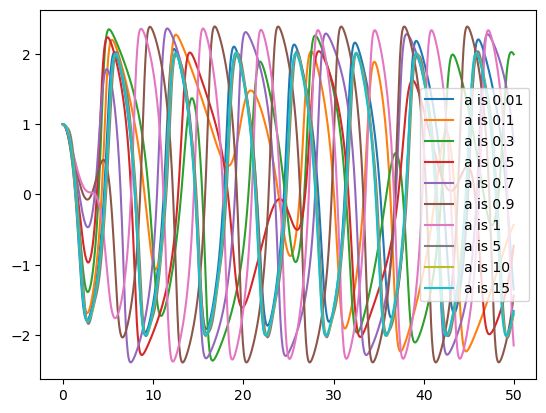

In [173]:
#Analysis for a while mu is 1
As=[0.01,0.1,0.3,0.5,0.7,0.9,1,5,10,15]
for a in As:
    trk4dd,xrk4dd,vrk4dd=RK4_2(VDPOD,50,1000,1,a)
    plt.plot(trk4dd,xrk4dd,label=f'a is {a}')
plt.legend()
plt.show()

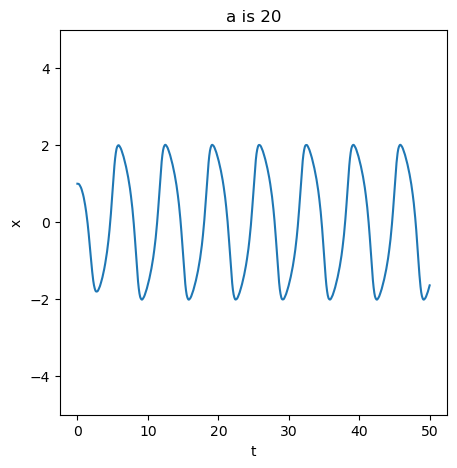

<Figure size 500x500 with 0 Axes>

In [181]:
#Animation as to how a changes while mu is 1:
As=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
fig = plt.figure(figsize=(5,5))
# Generate and save images
for a in As:
    trk4dd,xrk4dd,vrk4dd=RK4_2(VDPOD,50,1000,1,a)
    plt.plot(trk4dd,xrk4dd)
    plt.title(f'a is {a}')
    plt.xlabel('t')
    plt.ylabel('x')
    time.sleep(0.1)
    plt.ylim(-5,5)
    
    clear_output(wait = True)
    display(fig)            # Reset display
    fig.clear()  


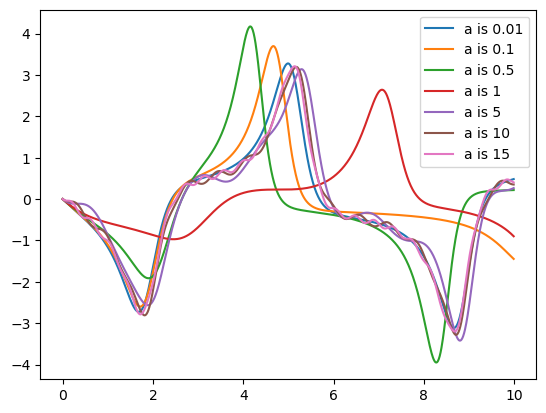

In [183]:
As=[0.01,0.1,0.5,1,5,10,15]
for a in As:
    trk4dd,xrk4dd,vrk4dd=RK4_2(VDPOD,10,1000,1.5,a)
    plt.plot(trk4dd,vrk4dd,label=f'a is {a}')
plt.legend()
plt.show()

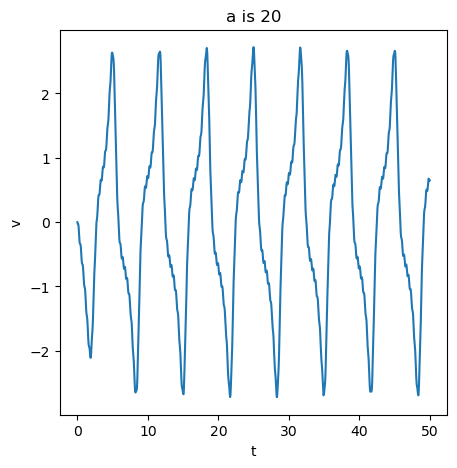

<Figure size 500x500 with 0 Axes>

In [187]:
As=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
fig = plt.figure(figsize=(5,5))
# Generate and save images
for a in As:
    trk4dd,xrk4dd,vrk4dd=RK4_2(VDPOD,50,1000,1,a)
    plt.plot(trk4dd,vrk4dd)
    plt.title(f'a is {a}')
    plt.xlabel('t')
    plt.ylabel('v')
    time.sleep(0.01)
    #plt.ylim(-30,30)
    
    clear_output(wait = True)
    display(fig)            # Reset display
    fig.clear()  


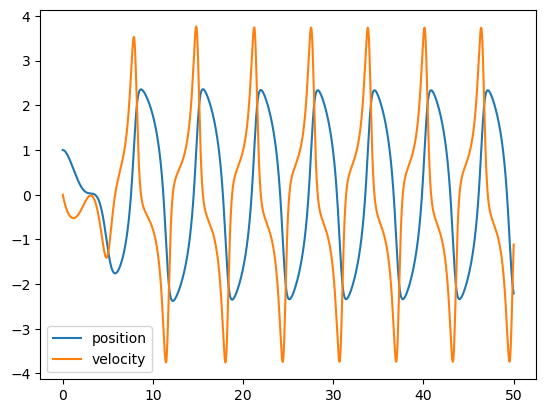

In [188]:
#Doing an enrgy Analysis:
#Looking at only mu=1 a=1
trk4dd,xrk4dd,vrk4dd=np.array(RK4_2(VDPOD,50,100000,1,1))
plt.plot(trk4dd,xrk4dd,label='position')
plt.plot(trk4dd,vrk4dd,label='velocity')
plt.legend()
plt.show()

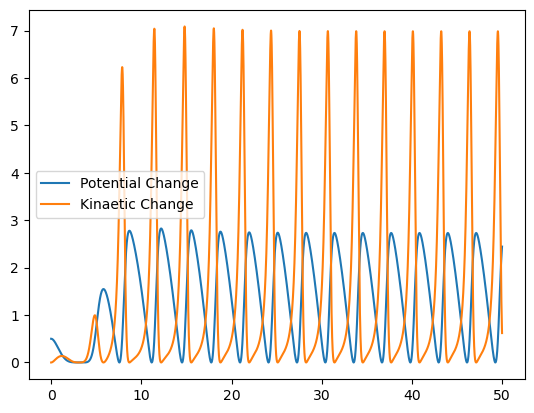

In [189]:
plt.plot(trk4dd,0.5*xrk4dd**2,label='Potential Change')
plt.plot(trk4dd,0.5*vrk4dd**2,label='Kinaetic Change')
plt.legend()
plt.show()

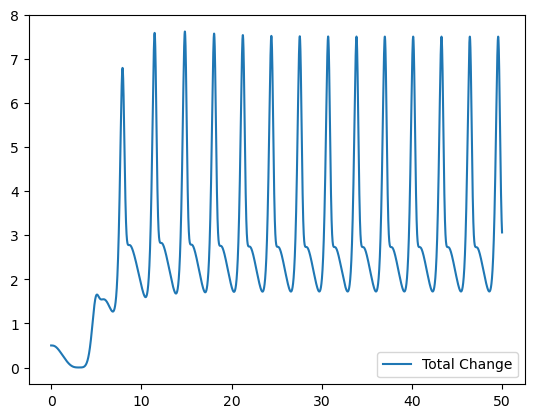

In [190]:
plt.plot(trk4dd,0.5*vrk4dd**2 + 0.5*xrk4dd**2,label='Total Change')
plt.legend()
plt.show()

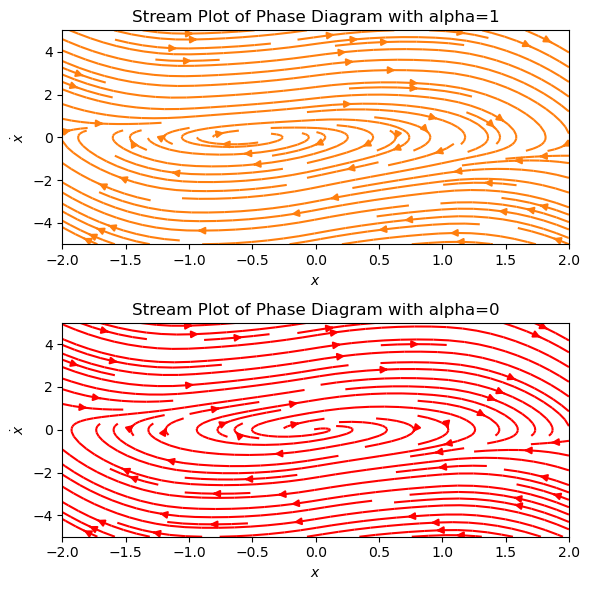

<Figure size 500x500 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

In [199]:

def generate_phase_space(t,x_lim, v_lim, grid_size,mu,a):

    x = np.linspace(x_lim[0], x_lim[1], grid_size)
    v = np.linspace(v_lim[0], v_lim[1], grid_size)
    
    X, V = np.meshgrid(x, v)
    
    dX, dV = VDPOD(a,mu,t,X, V)
    
    return X, V, dX, dV
x_lim = (-2, 2)
v_lim = (-5, 5)
grid_size = 5
mu= 1
a =1
tf = 20
n = 1000
X=[]
V=[]
dX=[]
dV=[]
for i, t in enumerate(np.linspace(0.1, 10, 50)):
    #t = i * tf / n_frames
    x,v,dx,dv = generate_phase_space(t, x_lim, v_lim, grid_size, mu,a)
    X.append(x)
    V.append(v)
    dX.append(dx)
    dV.append(dv)
    
mu=1
a=0
X2=[]
V2=[]
dX2=[]
dV2=[]
for i, t in enumerate(np.linspace(0.1, 10, 50)):
    #t = i * tf / n_frames
    x,v,dx,dv = generate_phase_space(t, x_lim, v_lim, grid_size, mu,a)
    X2.append(x)
    V2.append(v)
    dX2.append(dx)
    dV2.append(dv)


fig = plt.figure(figsize=(5,5))

for i, t in enumerate(np.linspace(0.1, 10, 50)):

    fig, axs = plt.subplots(2, 1, figsize=(6, 6))  
    axs[0].streamplot(X[i], V[i], dX[i], dV[i], color='C1')
    axs[0].set_title('Stream Plot of Phase Diagram with alpha=1')
    axs[0].set_xlabel(r'$x$')
    axs[0].set_ylabel(r'$\dot{x}$')
    
    axs[1].streamplot(X2[i], V2[i], dX2[i], dV2[i], color='red')
    axs[1].set_title('Stream Plot of Phase Diagram with alpha=0')
    axs[1].set_xlabel(r'$x$')
    axs[1].set_ylabel(r'$\dot{x}$')
    
    plt.tight_layout()
    
    
    
    print('The current value of i is:', i)
    
    time.sleep(0.0001)
    
    clear_output(wait = True)
    display(fig)            # Reset display
    fig.clear()  


##  Conclusion and Perspectives
Now as we draw conclusions lets decide which numerical integeration method was the best, For this I will look at the analytical solution vs all the other 6 solutions produced by the numerical methods and the their difference from the nalytical solutions.

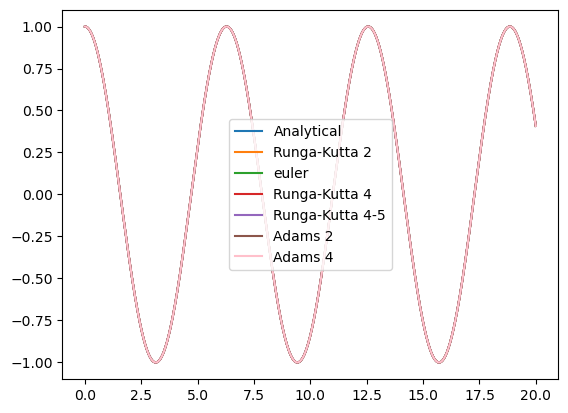

In [200]:
t=np.arange(0,20,20/1000000)
plt.plot(t,np.cos(t),label='Analytical')
plt.plot(t,xrkut,label='Runga-Kutta 2')
plt.plot(t,xe,label='euler')
plt.plot(trk4,xrk4,label='Runga-Kutta 4')
plt.plot(trk45,xrk45,label='Runga-Kutta 4-5')
plt.plot(t,xab2,label='Adams 2')
plt.plot(t,xab4,label='Adams 4',color='pink')
plt.legend()
plt.show()

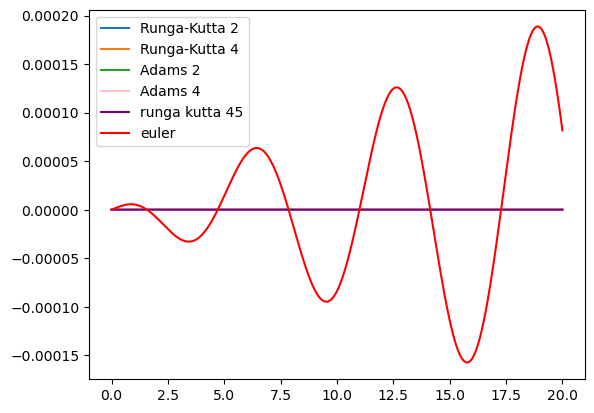

In [142]:
Act=np.cos(t)
plt.plot(t,xrkut-Act,label='Runga-Kutta 2')
plt.plot(t,xrk4-Act,label='Runga-Kutta 4')
plt.plot(t,xab2-Act,label='Adams 2')
plt.plot(t,xab4-Act,label='Adams 4',color='pink')
plt.plot(trk45,xrk45-np.cos(trk45),label='runga kutta 45',color='purple')
plt.plot(t,xe-Act,label='euler',color='red')
plt.legend()

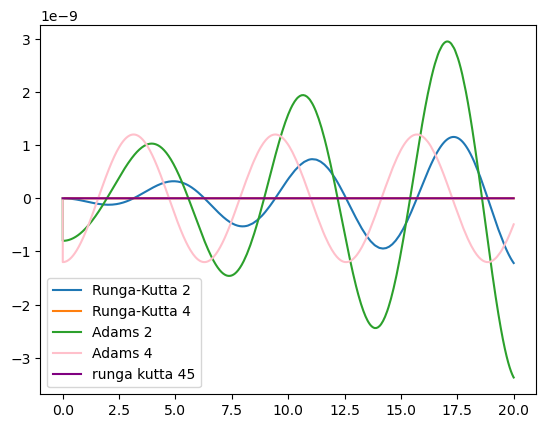

In [143]:
plt.plot(t,xrkut-Act,label='Runga-Kutta 2')
plt.plot(t,xrk4-Act,label='Runga-Kutta 4')
plt.plot(t,xab2-Act,label='Adams 2')
plt.plot(t,xab4-Act,label='Adams 4',color='pink')
plt.plot(trk45,xrk45-np.cos(trk45),label='runga kutta 45',color='purple')
plt.legend()

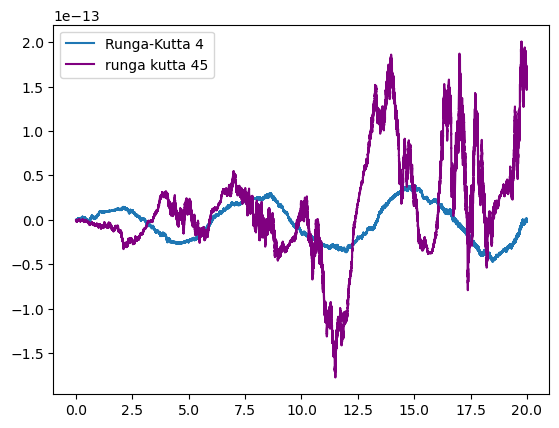

In [144]:
plt.plot(t,xrk4-Act,label='Runga-Kutta 4')
plt.plot(trk45,xrk45-np.cos(trk45),label='runga kutta 45',color='purple')
plt.legend()

In [145]:
#MEAN ERROR CALCULATION
mean_errors = {
    "Runga-kutta-2": np.mean(np.abs(xrkut-Act)),
    "Runga-kutta-4": np.mean(np.abs(xrk4-Act)),
    "Runga-kutta-45": np.mean(np.abs(xrk45-np.cos(trk45))),
    "Adams-Bashforth-2": np.mean(np.abs(xab2-Act)),
    "Adams-Bashforth-4": np.mean(np.abs(xab4-Act)),
    "Euler": np.mean(np.abs(xe-Act))
}
mean_errors

{'Runga-kutta-2': 4.156700765134582e-10,
 'Runga-kutta-4': 1.8397444364399766e-14,
 'Runga-kutta-45': 4.210915373792738e-14,
 'Adams-Bashforth-2': 1.2109266181654465e-09,
 'Adams-Bashforth-4': 7.747936771323581e-10,
 'Euler': 6.538656996656807e-05}

In [146]:
#Max errors:
max_errors = {
    "Runga-kutta-2": np.max(np.abs(xrkut-Act)),
    "Runga-kutta-4": np.max(np.abs(xrk4-Act)),
    "Runga-kutta-45": np.max(np.abs(xrk45-np.cos(trk45))),
    "Adams-Bashforth-2": np.max(np.abs(xab2-Act)),
    "Adams-Bashforth-4": np.max(np.abs(xab4-Act)),
    "Euler": np.max(np.abs(xe-Act))
}
max_errors

{'Runga-kutta-2': 1.2172624019868294e-09,
 'Runga-kutta-4': 4.729550084903167e-14,
 'Runga-kutta-45': 2.007283228522283e-13,
 'Adams-Bashforth-2': 3.369624801408122e-09,
 'Adams-Bashforth-4': 1.2000407334511465e-09,
 'Euler': 0.0001887781114034981}

So, the graphs, the mean error and the absolute maximum error both show that the best integration method was runga-kutta 4 which was used for the rest of the calculation. To investigae the mu and alpha dependance.
For the mu dependance let us consider how does the phase diagram, velocity vs time dependance and position vs time dependance change as we vary the mu parameter.

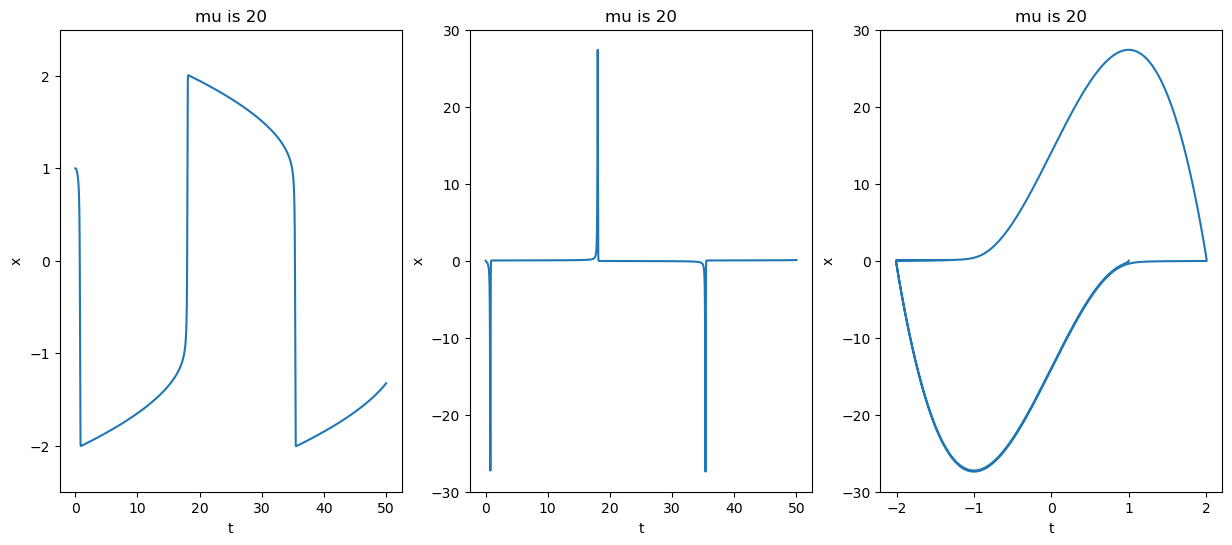

<Figure size 500x500 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

In [219]:
mus=[0.01,0.1,0,2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,15,20]
fig = plt.figure(figsize=(5,5))
# Generate and save images
for mu in mus:
    trk4d,xrk4d,vrk4d=RK4(VDPO,50,100000,mu)
    fig, axs = plt.subplots(1, 3, figsize=(15, 6))  
    axs[0].plot(trk4d,xrk4d)
    axs[0].set_title(f'mu is {mu}')
    axs[0].set_xlabel('t')
    axs[0].set_ylabel('x')
    axs[0].set_ylim(-2.5,2.5)
    
    axs[1].plot(trk4d,vrk4d)
    axs[1].set_title(f'mu is {mu}')
    axs[1].set_xlabel('t')
    axs[1].set_ylabel('x')
    axs[1].set_ylim(-30,30)
    
    axs[2].plot(xrk4d,vrk4d)
    axs[2].set_title(f'mu is {mu}')
    axs[2].set_xlabel('t')
    axs[2].set_ylabel('x')
    axs[2].set_ylim(-30,30)
    
    time.sleep(0.1)
   
    
    clear_output(wait = True)
    display(fig)            # Reset display
    fig.clear()  


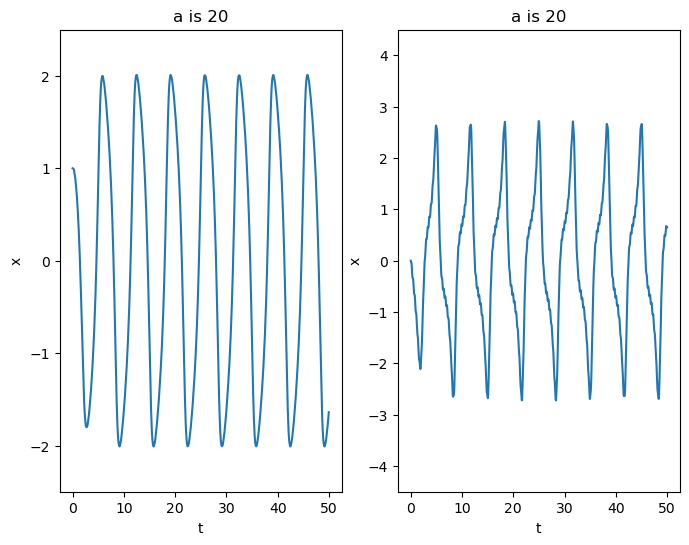

<Figure size 500x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [222]:
As=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
fig = plt.figure(figsize=(5,5))
# Generate and save images
for a in As:
    trk4dd,xrk4dd,vrk4dd=RK4_2(VDPOD,50,1000,1,a)
    fig, axs = plt.subplots(1, 2, figsize=(8, 6))  
    axs[0].plot(trk4dd,xrk4dd)
    axs[0].set_title(f'a is {a}')
    axs[0].set_xlabel('t')
    axs[0].set_ylabel('x')
    axs[0].set_ylim(-2.5,2.5)
    
    axs[1].plot(trk4dd,vrk4dd)
    axs[1].set_title(f'a is {a}')
    axs[1].set_xlabel('t')
    axs[1].set_ylabel('x')
    axs[1].set_ylim(-4.5,4.5)
    
    time.sleep(0.1)
   
    
    clear_output(wait = True)
    display(fig)            # Reset display
    fig.clear()  


KeyboardInterrupt: 

<Figure size 500x500 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

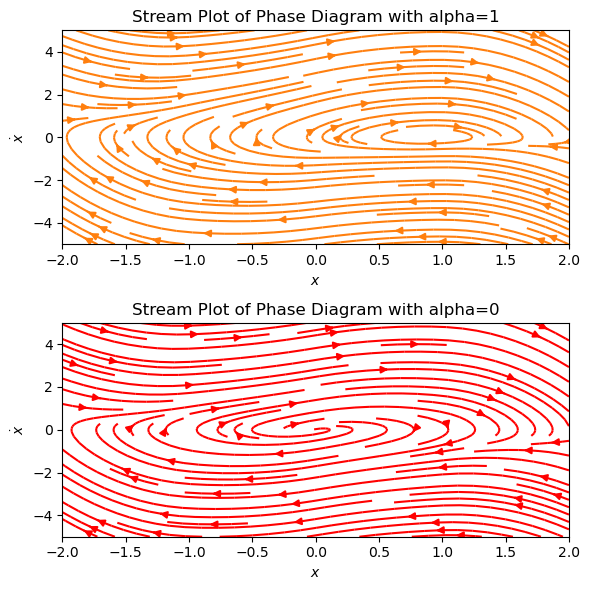

In [206]:
def generate_phase_space(t,x_lim, v_lim, grid_size,mu,a):

    x = np.linspace(x_lim[0], x_lim[1], grid_size)
    v = np.linspace(v_lim[0], v_lim[1], grid_size)
    
    X, V = np.meshgrid(x, v)
    
    dX, dV = VDPOD(a,mu,t,X, V)
    
    return X, V, dX, dV
x_lim = (-2, 2)
v_lim = (-5, 5)
grid_size = 5
mu= 1
a =1
tf = 20
n = 1000
X=[]
V=[]
dX=[]
dV=[]
for i, t in enumerate(np.linspace(0.1, 10, 50)):
    #t = i * tf / n_frames
    x,v,dx,dv = generate_phase_space(t, x_lim, v_lim, grid_size, mu,a)
    X.append(x)
    V.append(v)
    dX.append(dx)
    dV.append(dv)
    
mu=1
a=0
X2=[]
V2=[]
dX2=[]
dV2=[]
for i, t in enumerate(np.linspace(0.1, 10, 50)):
    #t = i * tf / n_frames
    x,v,dx,dv = generate_phase_space(t, x_lim, v_lim, grid_size, mu,a)
    X2.append(x)
    V2.append(v)
    dX2.append(dx)
    dV2.append(dv)


fig = plt.figure(figsize=(5,5))

for i, t in enumerate(np.linspace(0.1, 10, 50)):

    fig, axs = plt.subplots(2, 1, figsize=(6, 6))  
    axs[0].streamplot(X[i], V[i], dX[i], dV[i], color='C1')
    axs[0].set_title('Stream Plot of Phase Diagram with alpha=1')
    axs[0].set_xlabel(r'$x$')
    axs[0].set_ylabel(r'$\dot{x}$')
    
    axs[1].streamplot(X2[i], V2[i], dX2[i], dV2[i], color='red')
    axs[1].set_title('Stream Plot of Phase Diagram with alpha=0')
    axs[1].set_xlabel(r'$x$')
    axs[1].set_ylabel(r'$\dot{x}$')
    
    plt.tight_layout()
    
    
    
    print('The current value of i is:', i)
    
    time.sleep(0.0001)
    
    clear_output(wait = True)
    display(fig)            # Reset display
    fig.clear()  


##  Conclusion and Perspectives

_(What did you learn from your results? What obstacles did you run into? What would you do differently next time? Clearly provide quantitative answers to your question(s)?  At least one of your questions should be answered with numbers.  That is, it is not sufficient to answer "yes" or "no", but rather to say something quantitative such as variable 1 increased roughly 10% for every 1 year increase in variable 2.)_

## References

_(List the source(s) for any data and/or literature cited in your project.  Ideally, this should be formatted using a formal citation format (MLA or APA or other, your choice!).   
Multiple free online citation generators are available such as <a href="http://www.easybib.com/style">http://www.easybib.com/style</a>. 
**Important:** if you use **any** code that you find on the internet for your project you **must** cite it or you risk losing most/all of the points for you project.)_

##  Appendices
